 ## Testing codes for calculating VPF inside voids

### Sampling volume of sphere uniformly

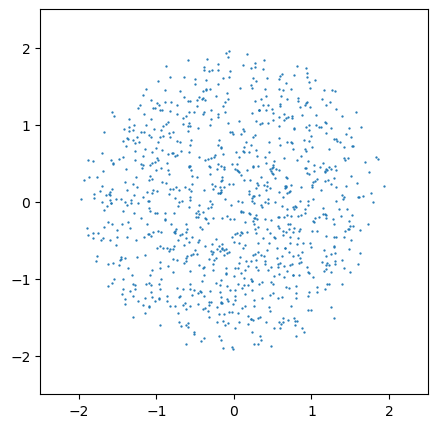

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
R = 2

phi = np.random.uniform(0,2*np.pi,n)
costheta = np.random.uniform(-1,1,n)
u = np.random.uniform(0,1,n)

theta = np.arccos(costheta)
r = R*u**(1/3)

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

plt.figure(figsize=(5, 5))
plt.scatter(x,y,s=.4)
plt.xlim([-R-.5,R+.5])
plt.ylim([-R-.5,R+.5])
plt.show()

##### I want to center the sampling volume on a given point in space

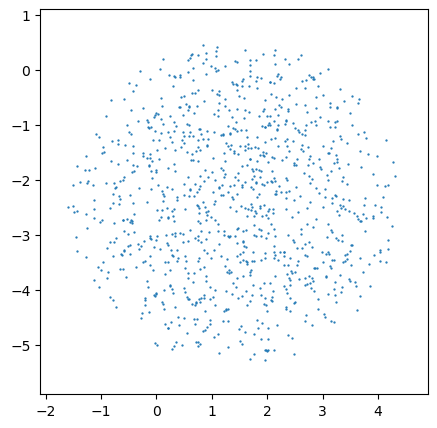

In [18]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000 #number of points to sample the volume
R = 3 #radius of sphere

#coords of center of void
xv, yv, zv = 1.4, -2.4, 1.4

phi = np.random.uniform(0,2*np.pi,n)
costheta = np.random.uniform(-1,1,n)
u = np.random.uniform(0,1,n)

theta = np.arccos(costheta)
r = R*u**(1/3)

x = r * np.sin(theta) * np.cos(phi) + xv
y = r * np.sin(theta) * np.sin(phi) + yv
z = r * np.cos(theta) + zv

plt.figure(figsize=(5, 5))
plt.scatter(x,y,s=.4)
plt.xlim([xv-R-.5,xv+R+.5])
plt.ylim([yv-R-.5,yv+R+.5])
plt.show()

### Ver si hay voids cuyos radios caen fuera del box

In [47]:
from astropy.io import ascii
"""
1) Radio [Mpc/h]
2-3-4) Posición del centro [Mpc/h]
5-6-7) Velocidad del centro [Mpc/h]
8) Delta integrada a 1R
9) Máxima Delta integrada entre 2R y 3R
10) Logaritmo de la probabilidad Possion
11) Número de pasos en recentado
"""
names = ['r','x','y','z','vx','vy','vz',\
    'deltaint_1r','maxdeltaint_2-3r','log10Poisson','Nrecenter']
voids = ascii.read('../data/tng300-1_voids.dat',names=names)
voids = voids[voids['r']>=7.]
print(f'Num of voids: {len(voids)}')

condx1 = voids['x']-voids['r']<0
idx_condx1 = np.where((condx1))[0]
print(f'Voids where x-r<0: {idx_condx1}')
print(np.min(voids['x']-voids['r']))

condx2 = voids['x']+voids['r']>205
idx_condx2 = np.where((condx2))[0]
print(f'Voids where x+r>205: {idx_condx2}')
print(np.max(voids['x']+voids['r']))

condy1 = voids['y']-voids['r']<0
idx_condy1 = np.where((condy1))[0]
print(f'Voids where y-r<0: {idx_condy1}')
print(np.min(voids['y']-voids['r']))

condy2 = voids['y']+voids['r']>205
idx_condy2 = np.where((condy2))[0]
print(f'Voids where y+r>205: {idx_condy2}')
print(np.max(voids['y']+voids['r']))

condz1 = voids['z']-voids['r']<0
idx_condz1 = np.where((condz1))[0]
print(f'Voids where z-r<0: {idx_condz1}')
print(np.min(voids['z']-voids['r']))

condz2 = voids['z']+voids['r']>205
idx_condz2 = np.where((condz2))[0]
print(f'Voids where z+r>205: {idx_condz2}')
print(np.max(voids['z']+voids['r']))


Num of voids: 82
Voids where x-r<0: [13 17 37 42 58 67]
-5.0389170000000005
Voids where x+r>205: [33 59 76]
212.476978
Voids where y-r<0: [75 79]
-8.261885999999999
Voids where y+r>205: [ 6  9 27 43]
212.50487
Voids where z-r<0: [37 74]
-2.0325320000000007
Voids where z+r>205: [ 9 22 25 43 45 80]
210.086214


##### Hay varios voids que caen fuera del box.
##### Quizás deba replicar 'periodicamente' los bordes del box y despreocuparme
##### Voy a ver si sería muy costoso

In [48]:
from cicTools import *
gxs = readTNG()
gxs.keys()


['x', 'y', 'z', 'vx', 'vy', 'vz']

In [55]:
print('Num of gxs total: ',len(gxs))

print('Num of gxs with x<11Mpc/h: ',len(gxs[gxs['x']<overhead]))
print('Num of gxs with y<11Mpc/h: ',len(gxs[gxs['y']<overhead]))
print('Num of gxs with z<11Mpc/h: ',len(gxs[gxs['z']<overhead]))

print('Num of gxs with x>205-11Mpc/h: ',len(gxs[gxs['x']>205000-11000]))
print('Num of gxs with y>205-11Mpc/h: ',len(gxs[gxs['y']>205000-11000]))
print('Num of gxs with x>205-11Mpc/h: ',len(gxs[gxs['z']>205000-11000]))

Num of gxs total:  13333606
Num of gxs with x<11Mpc/h:  655966
Num of gxs with y<11Mpc/h:  690842
Num of gxs with z<11Mpc/h:  693557
Num of gxs with x>205-11Mpc/h:  693998
Num of gxs with y>205-11Mpc/h:  687665
Num of gxs with x>205-11Mpc/h:  748491


In [57]:
print('Num of total gxs to be "replicated":', \
    655966+690842+693557+693998+687665+748491)
print('this is {}percent of the original data'\
    .format((655966+690842+693557+693998+687665+748491)*100/len(gxs)))

Num of total gxs to be "replicated": 4170519
this is 31.27825285972902percent of the original data


##### Voy a tratar de replicar periodicamente el box

###### Acá me di cuenta que en las celdas anteriores me faltó replicar las combinaciones xy, xz, yz. De acá en adelante están tenidas en cuenta

In [94]:
from astropy.table import vstack
lbox = 205000

"""
Single axes
"""
newgxs1_x = gxs[gxs['x']<11000]
newgxs1_x['x'] += lbox

newgxs1_y = gxs[gxs['y']<11000]
newgxs1_y['y'] += lbox

newgxs1_z = gxs[gxs['z']<11000]
newgxs1_z['z'] += lbox

newgxs2_x = gxs[gxs['x']>lbox-11000]
newgxs2_x['x'] -= lbox

newgxs2_y = gxs[gxs['y']>lbox-11000]
newgxs2_y['y'] -= lbox

newgxs2_z = gxs[gxs['z']>lbox-11000]
newgxs2_z['z'] -= lbox

"""
XY
"""
newgxs1_xy = gxs[np.logical_and(gxs['x']<11000,gxs['y']<11000)]
newgxs1_xy['x'] += lbox
newgxs1_xy['y'] += lbox

newgxs2_xy = gxs[np.logical_and(gxs['x']>lbox-11000,gxs['y']>lbox-11000)]
newgxs2_xy['x'] -= lbox
newgxs2_xy['y'] -= lbox

newgxs3_xy = gxs[np.logical_and(gxs['x']<11000,gxs['y']>lbox-11000)]
newgxs3_xy['x'] += lbox
newgxs3_xy['y'] -= lbox

newgxs4_xy = gxs[np.logical_and(gxs['x']>lbox-11000,gxs['y']<11000)]
newgxs4_xy['x'] -= lbox
newgxs4_xy['y'] += lbox

"""
XZ
"""
newgxs1_xz = gxs[np.logical_and(gxs['x']<11000,gxs['z']<11000)]
newgxs1_xz['x'] += lbox
newgxs1_xz['z'] += lbox

newgxs2_xz = gxs[np.logical_and(gxs['x']>lbox-11000,gxs['z']>lbox-11000)]
newgxs2_xz['x'] -= lbox
newgxs2_xz['z'] -= lbox

newgxs3_xz = gxs[np.logical_and(gxs['x']<11000,gxs['z']>lbox-11000)]
newgxs3_xz['x'] += lbox
newgxs3_xz['z'] -= lbox

newgxs4_xz = gxs[np.logical_and(gxs['x']>lbox-11000,gxs['z']<11000)]
newgxs4_xz['x'] -= lbox
newgxs4_xz['z'] += lbox

"""
YZ
"""
newgxs1_yz = gxs[np.logical_and(gxs['y']<11000,gxs['z']<11000)]
newgxs1_yz['y'] += lbox
newgxs1_yz['z'] += lbox

newgxs2_yz = gxs[np.logical_and(gxs['y']>lbox-11000,gxs['z']>lbox-11000)]
newgxs2_yz['y'] -= lbox
newgxs2_yz['z'] -= lbox

newgxs3_yz = gxs[np.logical_and(gxs['y']<11000,gxs['z']>lbox-11000)]
newgxs3_yz['y'] += lbox
newgxs3_yz['z'] -= lbox

newgxs4_yz = gxs[np.logical_and(gxs['y']>lbox-11000,gxs['z']<11000)]
newgxs4_yz['y'] -= lbox
newgxs4_yz['z'] += lbox

newgxs = vstack([gxs,newgxs1_x,newgxs1_y,newgxs1_z,\
    newgxs2_x,newgxs2_y,newgxs2_z,\
        newgxs1_xy,newgxs2_xy,newgxs3_xy,newgxs4_xy,\
        newgxs1_xz,newgxs2_xz,newgxs3_xz,newgxs4_xz,\
        newgxs1_yz,newgxs2_yz,newgxs3_yz,newgxs4_yz])

print(len(gxs),len(newgxs), len(newgxs)-len(gxs))


13333606 18002750 4669144


##### Parece que anduvo. Voy a hacer un plotcito para asegurarme

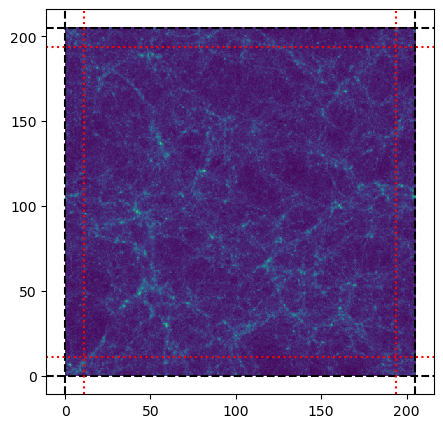

In [107]:
import numpy as np
import matplotlib.pyplot as plt

#Box Original
plt.figure(figsize=(5, 5))
plt.hist2d(gxs['x']/1000,gxs['y']/1000,bins=500)

plt.hlines(0,-11,205+11,ls='--',color='k')
plt.hlines(205,-11,205+11,ls='--',color='k')
plt.vlines(0,-11,205+11,ls='--',color='k')
plt.vlines(205,-11,205+11,ls='--',color='k')
plt.hlines(11,-11,205+11,ls=':',color='r')
plt.hlines(205-11,-11,205+11,ls=':',color='r')
plt.vlines(11,-11,205+11,ls=':',color='r')
plt.vlines(205-11,-11,205+11,ls=':',color='r')

plt.xlim([-11,205+11])
plt.ylim([-11,205+11])

plt.show()


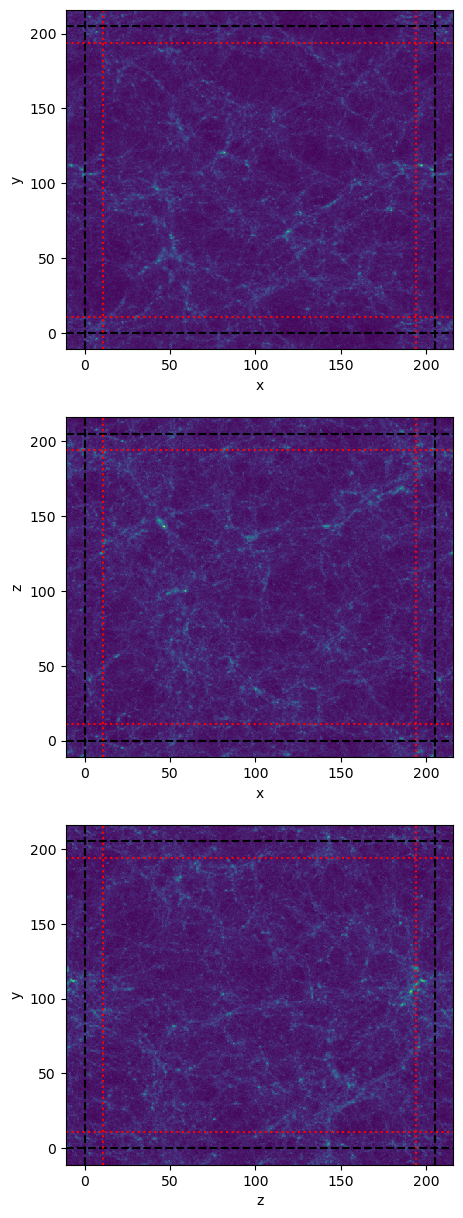

In [112]:
import numpy as np
import matplotlib.pyplot as plt

#Box Replicado
fig, axs = plt.subplots(3, 1, figsize=(5, 15))

bins = 500

axs[0].hist2d(newgxs['x']/1000,newgxs['y']/1000,bins=bins)
axs[1].hist2d(newgxs['x']/1000,newgxs['z']/1000,bins=bins)
axs[2].hist2d(newgxs['z']/1000,newgxs['y']/1000,bins=bins)

for i in range(len(axs)):
    axs[i].hlines(0,-11,205+11,ls='--',color='k')
    axs[i].hlines(205,-11,205+11,ls='--',color='k')
    axs[i].vlines(0,-11,205+11,ls='--',color='k')
    axs[i].vlines(205,-11,205+11,ls='--',color='k')

    axs[i].hlines(11,-11,205+11,ls=':',color='r')
    axs[i].hlines(205-11,-11,205+11,ls=':',color='r')
    axs[i].vlines(11,-11,205+11,ls=':',color='r')
    axs[i].vlines(205-11,-11,205+11,ls=':',color='r')

axs[0].set_xlabel('x')
axs[1].set_xlabel('x')
axs[2].set_xlabel('z')

axs[0].set_ylabel('y')
axs[1].set_ylabel('z')
axs[2].set_ylabel('y')

plt.show()


##### Parece que funciona el replicado!

##### Voy a hacer una funcion para replicar

204999.97 215999.98
205000.0 215999.97
204999.98 215999.98
-0.09365853 -10999.969
0.005305895 -10999.984
0.022796735 -10999.984


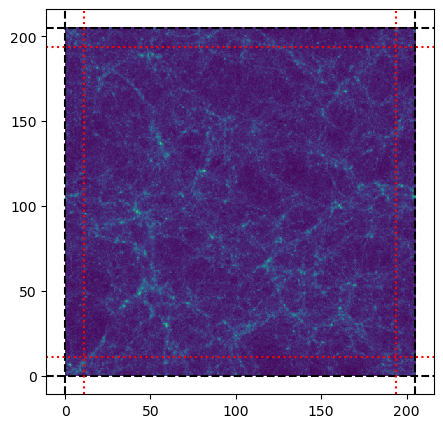

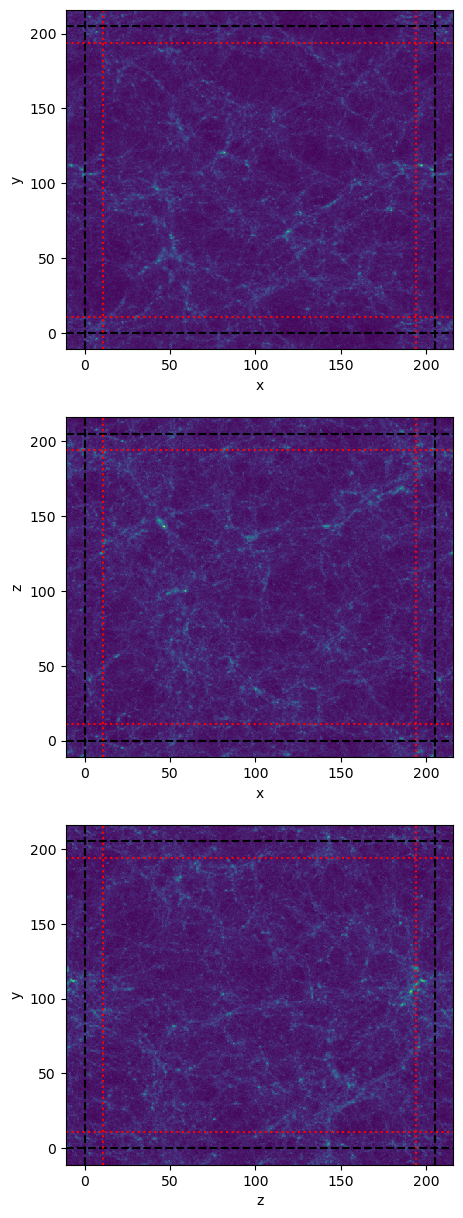

In [114]:
def perrep(gxs,lbox,overhead):

    from astropy.table import vstack
    
    """
    Single axes
    """
    newgxs1_x = gxs[gxs['x']<overhead]
    newgxs1_x['x'] += lbox

    newgxs1_y = gxs[gxs['y']<overhead]
    newgxs1_y['y'] += lbox

    newgxs1_z = gxs[gxs['z']<overhead]
    newgxs1_z['z'] += lbox

    newgxs2_x = gxs[gxs['x']>lbox-overhead]
    newgxs2_x['x'] -= lbox

    newgxs2_y = gxs[gxs['y']>lbox-overhead]
    newgxs2_y['y'] -= lbox

    newgxs2_z = gxs[gxs['z']>lbox-overhead]
    newgxs2_z['z'] -= lbox

    """
    XY
    """
    newgxs1_xy = gxs[np.logical_and(gxs['x']<overhead,gxs['y']<overhead)]
    newgxs1_xy['x'] += lbox
    newgxs1_xy['y'] += lbox

    newgxs2_xy = gxs[np.logical_and(gxs['x']>lbox-overhead,gxs['y']>lbox-overhead)]
    newgxs2_xy['x'] -= lbox
    newgxs2_xy['y'] -= lbox

    newgxs3_xy = gxs[np.logical_and(gxs['x']<overhead,gxs['y']>lbox-overhead)]
    newgxs3_xy['x'] += lbox
    newgxs3_xy['y'] -= lbox

    newgxs4_xy = gxs[np.logical_and(gxs['x']>lbox-overhead,gxs['y']<overhead)]
    newgxs4_xy['x'] -= lbox
    newgxs4_xy['y'] += lbox

    """
    XZ
    """
    newgxs1_xz = gxs[np.logical_and(gxs['x']<overhead,gxs['z']<overhead)]
    newgxs1_xz['x'] += lbox
    newgxs1_xz['z'] += lbox

    newgxs2_xz = gxs[np.logical_and(gxs['x']>lbox-overhead,gxs['z']>lbox-overhead)]
    newgxs2_xz['x'] -= lbox
    newgxs2_xz['z'] -= lbox

    newgxs3_xz = gxs[np.logical_and(gxs['x']<overhead,gxs['z']>lbox-overhead)]
    newgxs3_xz['x'] += lbox
    newgxs3_xz['z'] -= lbox

    newgxs4_xz = gxs[np.logical_and(gxs['x']>lbox-overhead,gxs['z']<overhead)]
    newgxs4_xz['x'] -= lbox
    newgxs4_xz['z'] += lbox

    """
    YZ
    """
    newgxs1_yz = gxs[np.logical_and(gxs['y']<overhead,gxs['z']<overhead)]
    newgxs1_yz['y'] += lbox
    newgxs1_yz['z'] += lbox

    newgxs2_yz = gxs[np.logical_and(gxs['y']>lbox-overhead,gxs['z']>lbox-overhead)]
    newgxs2_yz['y'] -= lbox
    newgxs2_yz['z'] -= lbox

    newgxs3_yz = gxs[np.logical_and(gxs['y']<overhead,gxs['z']>lbox-overhead)]
    newgxs3_yz['y'] += lbox
    newgxs3_yz['z'] -= lbox

    newgxs4_yz = gxs[np.logical_and(gxs['y']>lbox-overhead,gxs['z']<overhead)]
    newgxs4_yz['y'] -= lbox
    newgxs4_yz['z'] += lbox

    newgxs = vstack([gxs,newgxs1_x,newgxs1_y,newgxs1_z,\
        newgxs2_x,newgxs2_y,newgxs2_z,\
            newgxs1_xy,newgxs2_xy,newgxs3_xy,newgxs4_xy,\
            newgxs1_xz,newgxs2_xz,newgxs3_xz,newgxs4_xz,\
            newgxs1_yz,newgxs2_yz,newgxs3_yz,newgxs4_yz])

    return newgxs
    
newgxs = perrep(gxs,205000,11000)

print(np.max(gxs['x']), np.max(newgxs['x']))
print(np.max(gxs['y']), np.max(newgxs['y']))
print(np.max(gxs['z']), np.max(newgxs['z']))

print(np.min(gxs['x']), np.min(newgxs['x']))
print(np.min(gxs['y']), np.min(newgxs['y']))
print(np.min(gxs['z']), np.min(newgxs['z']))

import numpy as np
import matplotlib.pyplot as plt

#Box Original
plt.figure(figsize=(5, 5))
plt.hist2d(gxs['x']/1000,gxs['y']/1000,bins=500)

plt.hlines(0,-11,205+11,ls='--',color='k')
plt.hlines(205,-11,205+11,ls='--',color='k')
plt.vlines(0,-11,205+11,ls='--',color='k')
plt.vlines(205,-11,205+11,ls='--',color='k')
plt.hlines(11,-11,205+11,ls=':',color='r')
plt.hlines(205-11,-11,205+11,ls=':',color='r')
plt.vlines(11,-11,205+11,ls=':',color='r')
plt.vlines(205-11,-11,205+11,ls=':',color='r')

plt.xlim([-11,205+11])
plt.ylim([-11,205+11])

plt.show()

#Box Replicado
fig, axs = plt.subplots(3, 1, figsize=(5, 15))

bins = 500

axs[0].hist2d(newgxs['x']/1000,newgxs['y']/1000,bins=bins)
axs[1].hist2d(newgxs['x']/1000,newgxs['z']/1000,bins=bins)
axs[2].hist2d(newgxs['z']/1000,newgxs['y']/1000,bins=bins)

for i in range(len(axs)):
    axs[i].hlines(0,-11,205+11,ls='--',color='k')
    axs[i].hlines(205,-11,205+11,ls='--',color='k')
    axs[i].vlines(0,-11,205+11,ls='--',color='k')
    axs[i].vlines(205,-11,205+11,ls='--',color='k')

    axs[i].hlines(11,-11,205+11,ls=':',color='r')
    axs[i].hlines(205-11,-11,205+11,ls=':',color='r')
    axs[i].vlines(11,-11,205+11,ls=':',color='r')
    axs[i].vlines(205-11,-11,205+11,ls=':',color='r')

axs[0].set_xlabel('x')
axs[1].set_xlabel('x')
axs[2].set_xlabel('z')

axs[0].set_ylabel('y')
axs[1].set_ylabel('z')
axs[2].set_ylabel('y')

plt.show()